# Лабораторная работа №8. Численное решение краевых задач для дифференциальных уравнений
## Бегунов Никита
## А-13б-20
### Вариант 41

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Задача 1
**Задание:** Для уравнения второго порядка $-u'' + pu' + qu = f(x)$ найти решение краевой задачи:
$$
\begin{cases}
-u'' - 2u' + 15u = 27x^2 + 13x + 7.5, x \in (0,1) \\
u(0) = 0, u(1) = -6.55
\end{cases}
$$

1. Найти аналитическое решение задачи

$$
-u'' - 2u' + 15u = 27x^2 + 13x + 7.5 \\
-\lambda^2 - 2\lambda + 15 = 0 \\
\lambda = -5, \lambda = 3 \\
u_{оо} = C_1e^{-5x} + C_2e^{3x} \\
u_{чн} = Ax^2 + Bx + C \\
-2A - 4Ax - 2B + 15Ax^2 + 15Bx + 15C = 27x^2 + 13x + 7.5 \\
15Ax^2 + (15B - 4A)x + (15C - 2A - 2B) = 27x^2 + 13x + 7.5 \\
\begin{cases}
15A = 27 \\
15B - 4A = 13 \\
15C - 2A - 2B = 7.5 \\
\end{cases}
A = {9\over5}, B = {101\over75}, C = {2069\over2250} \\
u = C_1e^{-5x} + C_2e^{3x} + {9\over5}x^2 + {101\over75}x + {2069\over2250} \\
\begin{cases}
u(0) = C_1 + C_2 + {2069\over2250} = 0 \\
u(1) = C_1e^{-5} + C_2e^3 + {9\over5} + {101\over75} + {2069\over2250} = -6.55 \\
\end{cases}\\
\begin{cases}
C_1 + C_2 = -{2069\over2250} \\
C_1e^{-5} + C_2e^3 = -{47773\over{4500}} \\
\end{cases} \\
C_1 = -{2069\over2250} - {-47773e^5+4138\over{-4500+4500e^8}} = -0.391136\\
C_2 = {-47773e^5 + 4138 \over{-4500 + 4500e^8}} = -0.528419 \\
u = -0.391136e^{-5x} - 0.528419e^{3x} + 1.8x^2 + 1.34667x + 0.919556 \\
$$

2. Найти приближенное решение задачи с точностью 0.001  
Для решения задачи аппроксимирует производные со вторым порядком точности по h:
$$
u'' = {u_{i+1} - 2u_i + u_{i-1}\over h^2}, u' = {u_{i+1} - u_{i-1}\over h}
$$
И построим разностную схему:
$$
-{u_{i+1} - 2u_i + u_{i-1}\over h^2} + p{u_{i+1} - u_{i-1}\over h} + qu_i = f_i \\
\begin{cases}
\big{(} -{1\over h^2} - {p\over 2h} \big{)}u_{i-1} + \big{(} {2\over h^2} + q \big{)}u_i + \big{(} {p\over 2h} - {1\over h^2} \big{)} = f_i \\
u_0 = u_a, u_n = u_b \\
\end{cases}
$$

In [57]:
def Solve(p, q, f, a, b, ua, ub, eps):
    def DoStep(h, a, b):
        n = math.ceil((b-a)/h) + 1
        h = (b-a)/(n-1)
        A = np.zeros((n, n), dtype = float)
        b = np.zeros(n, dtype = float)
        for i in range(n):
            if i == 0 or i == n-1:
                A[i][i] = 1
                if i == 0:
                    b[i] = ua
                elif i == n-1:
                    b[i] = ub
                continue
            A[i][i-1] = -1/(h**2) - p/(2*h)
            A[i][i] = 2/(h**2) + q
            A[i][i+1] = p/(2*h) - 1/(h**2)
            b[i] = f(i*h)
        return np.linalg.solve(A, b), h
    
    def GetError(y1, y2):
        error = []
        for i in range(len(y1)):
            error.append(np.abs(y1[i] - y2[2*i]) / 3)
        return error
    
    h = (b - a) / 2
    y1, h = DoStep(h, a, b)
    y2, h = DoStep(h/2, a, b)
    error = GetError(y1, y2)
    while np.max(error) > eps:
        y1 = y2
        y2, h = DoStep(h/2, a, b)
        error = GetError(y1, y2)
    
    return y2, error

In [58]:
def f(x):
    return 27*x**2 + 13*x + 7.5

p = -2
q = 15
a, ua = 0, 0
b, ub = 1, -6.55
eps = 0.001
y, error = Solve(p, q, f, a, b, ua, ub, eps)

3. На одном чертеже построить графики приближенного и аналитического решения задачи. Отдельно построить график погрешности.

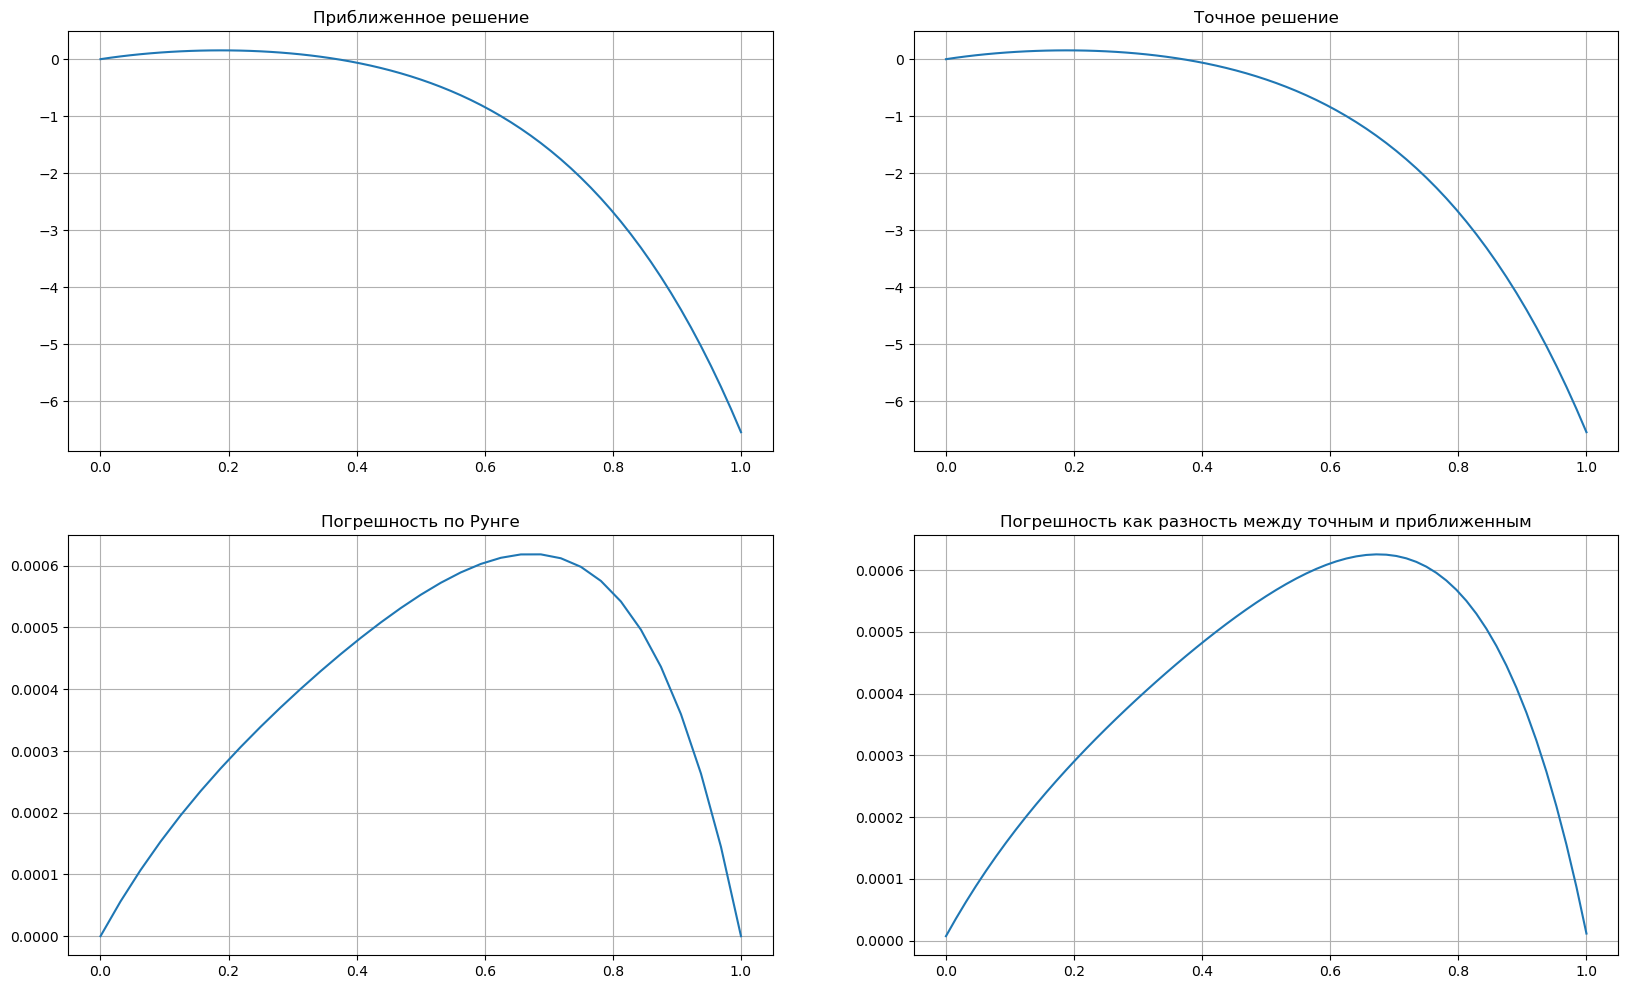

In [59]:
def ExactSolution(x):
    return -0.39113*np.e**(-5*x) - 0.528419*np.e**(3*x) \
            +1.8*x**2 + 1.34667*x + 0.919556

x = np.linspace(a, b, len(y))
fig, axs = plt.subplots(2, 2, figsize = (20,12))
axs[0][0].set_title('Приближенное решение')
axs[0][0].plot(x, y)
axs[0][0].grid()
axs[0][1].set_title('Точное решение')
axs[0][1].plot(x, ExactSolution(x))
axs[0][1].grid()
axs[1][0].set_title('Погрешность по Рунге')
axs[1][0].plot(np.linspace(a, b, len(error)), error)
axs[1][0].grid()
axs[1][1].set_title('Погрешность как разность между точным и приближенным')
axs[1][1].plot(x, np.abs(y - ExactSolution(x)))
axs[1][1].grid()

## Задача 2
**Задание:** Стержень составляется из трех частей одинаковой длины 1 и с разными коэффициентами теплопроводности. Концы стержня поддерживаются при постоянной температуре. В каком порядке следует составить части стержня, чтобы указанная точка $x_0$ стержня имела максимальную температуру?  
Математически задача формулируется следующим образом: найти приближенное решение краевой задачи:
$$
\begin{cases}
-(k(x)u')' + 15u = 27x^2 + 13x + 7.5, x \in (0,3) \\
u(0) = 8, u(3) = 6
\end{cases}
$$
Где 
$$
k(x) = 
\begin{cases}
k_1(x), 0 \leq x \leq 1 \\
k_2(x), 1 \leq x \leq 2 \\
k_3(x), 2 \leq x \leq 3 \\
\end{cases} \\
k_1(x) = 2 + \sqrt{x} \\
k_2(x) = {x+1\over{x^2+3}} \\
k_3(x) = 15\\
$$
при каждой конфигурации стержня. Значения $q(x)$ и $f(x)$ взять из таблицы 8.1, остальные значения взять в таблице 8.2. Сравнить полученные значения температуры в фиксированной точке в каждом варианте $(x_0=1.1)$. Выбрать оптимальный результат.

1. Составить подпрограмму, вычисляющую функцию k(x) из индивидуального варианта.  
Для решения задачи аппроксимирует -(k(x)u')' со вторым порядком точности по h:
$$
-(k(x)u')' = -k_{i+1/2}{u_{i+1} - u_i\over h^2} + k_{i-1/2}{u_i - u_{i-1}\over h^2}
$$
И построим разностную схему:
$$
-k_{i+1/2}{u_{i+1} - u_i\over h^2} + k_{i-1/2}{u_i - u_{i-1}\over h^2} + q_iu_i = f_i \\
\begin{cases}
\big{(} -{k_{i-1/2}\over h^2} \big{)}u_{i-1} + \big{(} q + {k_{i-1/2} + k_{i+1/2}\over h^2} \big{)}u_i + \big{(} -{k_{i+1/2}\over h^2} \big{)} = f_i \\
u_0 = u_a, u_n = u_b \\
\end{cases}
$$

In [60]:
def k1(x):
    return 2 + np.sqrt(x)
def k2(x):
    return (x+1) / (x**2 + 3)
def k3(x):
    return 15

2. Найти приближенное решение задачи с точностью 0.001, модифицируя разностную схему из задачи 8.1.


In [61]:
def SolveWithK(k1, k2, k3, q, f, a, b, ua, ub, eps):
    def k(x):
        if 0 <= x <= 1:
            return k1(x)
        elif 1 <= x <= 2:
            return k2(x)
        elif 2 <= x <= 3:
            return k3(x)
    
    def DoStep(h, a, b):
        n = math.ceil((b-a)/h) + 1
        h = (b-a)/(n-1)
        A = np.zeros((n, n), dtype = float)
        b = np.zeros(n, dtype = float)
        for i in range(n):
            if i == 0 or i == n-1:
                A[i][i] = 1
                if i == 0:
                    b[i] = ua
                elif i == n-1:
                    b[i] = ub
                continue
            A[i][i-1] = -k(i*h-h/2)/(h**2)
            A[i][i] = q + (k(i*h-h/2) + k(i*h+h/2))/(h**2)
            A[i][i+1] = -k(i*h+h/2)/(h**2)
            b[i] = f(i*h)
        return np.linalg.solve(A, b), h
    
    def GetError(y1, y2):
        error = []
        for i in range(len(y1)):
            error.append(np.abs(y1[i] - y2[2*i]) / 3)
        return error
    
    h = (b - a) / 2
    y1, h = DoStep(h, a, b)
    y2, h = DoStep(h/2, a, b)
    while np.max(GetError(y1, y2)) > eps:
        y1 = y2
        y2, h = DoStep(h/2, a, b)
    
    return y2

In [62]:
def f(x):
    return 27*x**2 + 13*x + 7.5

q = 15
a, ua = 0, 8
b, ub = 3, 6
eps = 0.01
y123 = SolveWithK(k1, k2, k3, q, f, a, b, ua, ub, eps)

3. Для каждого варианта конфигурации стержня произвести расчет по разностной схеме.

In [63]:
y123 = SolveWithK(k1, k2, k3, q, f, a, b, ua, ub, eps)
y132 = SolveWithK(k1, k3, k2, q, f, a, b, ua, ub, eps)
y213 = SolveWithK(k2, k1, k3, q, f, a, b, ua, ub, eps)
y231 = SolveWithK(k2, k3, k1, q, f, a, b, ua, ub, eps)
y312 = SolveWithK(k3, k1, k2, q, f, a, b, ua, ub, eps)
y321 = SolveWithK(k3, k2, k1, q, f, a, b, ua, ub, eps)

4. Построить на одном чертеже графики приближенного решения для каждой конфигурации стержня.


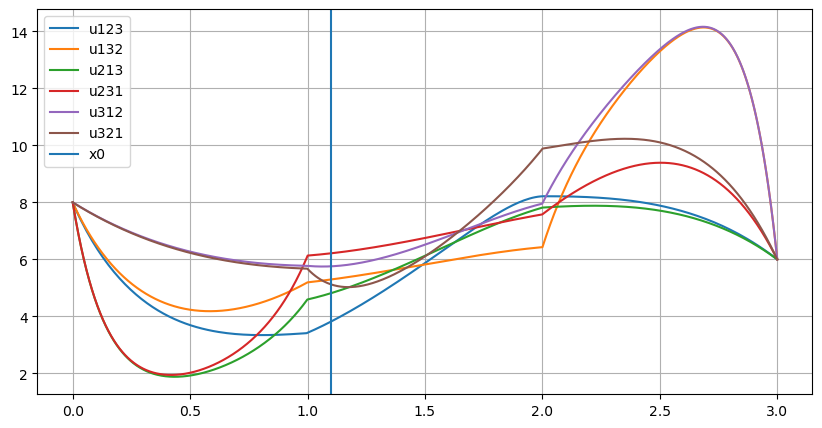

In [64]:
fig = plt.subplots(1, 1, figsize=(10,5))
plt.plot(np.linspace(a, b, len(y123)), y123, label = "u123")
plt.plot(np.linspace(a, b, len(y132)), y132, label = "u132")
plt.plot(np.linspace(a, b, len(y213)), y213, label = "u213")
plt.plot(np.linspace(a, b, len(y231)), y231, label = "u231")
plt.plot(np.linspace(a, b, len(y312)), y312, label = "u312")
plt.plot(np.linspace(a, b, len(y321)), y321, label = "u321")
plt.axvline(x = 1.1, label = "x0") 
plt.legend()
plt.grid()

5. Сравнив полученныые решения, выбрать оптимальный результат.  
Максимальная температура достигается при конфигурации стержня u231, то есть при
$$
k(x) = 
\begin{cases}
{x+1\over{x^2+3}}, 0 \leq x \leq 1 \\
15, 1 \leq x \leq 2 \\
2 + \sqrt{x}, 2 \leq x \leq 3 \\
\end{cases}
$$